### Set of input files with benchmark results to be processed

In [2]:
input_files = (
    "native.times",
    "native_optim.times",
    "python_3_8.times",
    "python_3_9.times",
    "python_3_10.times",
    "python_3_11.times",
    "python_3_12.times",
    "mypyc_no_type_hints.times",
    "mypyc_with_type_hints.times",
    "numba2.times",
    "numba3.times",
    "numba4.times")

In [3]:
import pandas as pd

### Helper functions to read benchmark results

In [4]:
def read_benchmark_result(filename):
    return pd.read_csv(filename, sep=" ", header=0, names=("size", "time", "memory"))

def filename2description(filename):
    return filename.split(".")[0].replace("_", " ")
    
def read_all_results(input_files):
    return {filename2description(input_file): read_benchmark_result(input_file) for input_file in input_files}

### Combine all results into one DataFrame

In [5]:
r = read_all_results(input_files)

results = pd.DataFrame()

# column to be transformed into index
results["size"] = (r["native"]["size"])

for description, df in r.items():
    results[description] = df["time"]

# create meaningful index
results.set_index("size", inplace=True)
results

,native,native optim,python 3 8,python 3 9,python 3 10,python 3 11,python 3 12,mypyc no type hints,mypyc with type hints,numba2,numba3,numba4
size,,,,,,,,,,,,
24,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.68,3.04,3.02
32,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.70,3.06,3.95
48,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.70,4.06,4.61
64,0.00,0.00,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.74,4.67,4.59
96,0.00,0.00,0.05,0.04,0.05,0.04,0.04,0.05,0.04,0.79,4.62,4.95
128,0.00,0.00,0.08,0.08,0.08,0.06,0.07,0.08,0.07,1.30,4.58,4.65
192,0.01,0.00,0.18,0.17,0.19,0.13,0.13,0.17,0.13,1.74,4.58,4.61
256,0.01,0.01,0.33,0.31,0.33,0.23,0.28,0.29,0.23,2.15,4.58,4.67
384,0.03,0.02,0.74,0.69,0.76,0.51,0.62,0.66,0.50,3.38,4.70,4.64


### Set plot size

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
xticks=df.index

### Plot results

<Axes: title={'center': 'Startup time'}, xlabel='size'>

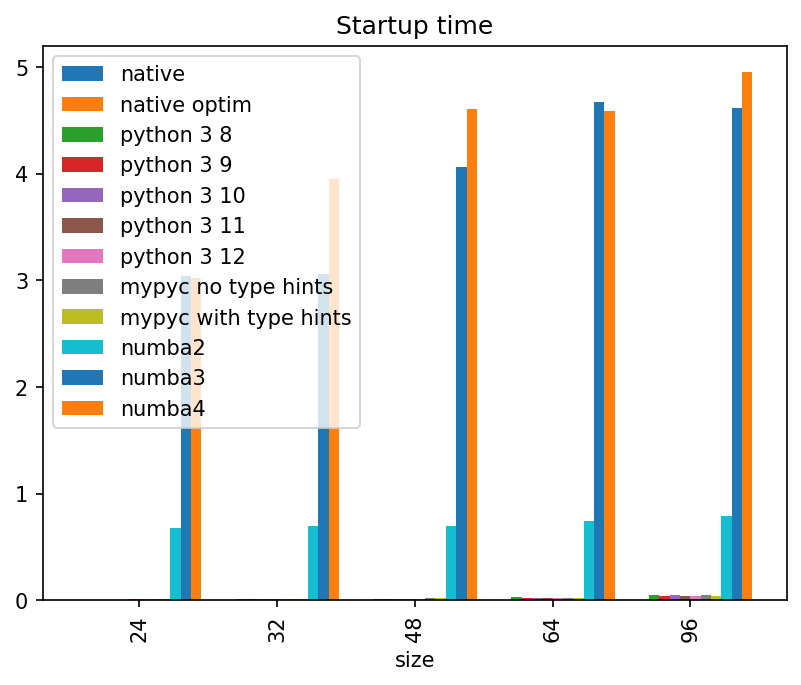

In [8]:
results[0:5].plot(kind='bar', stacked=False, width=0.9, title="Startup time")

<Axes: title={'center': 'Computation with startup time influence'}, xlabel='size'>

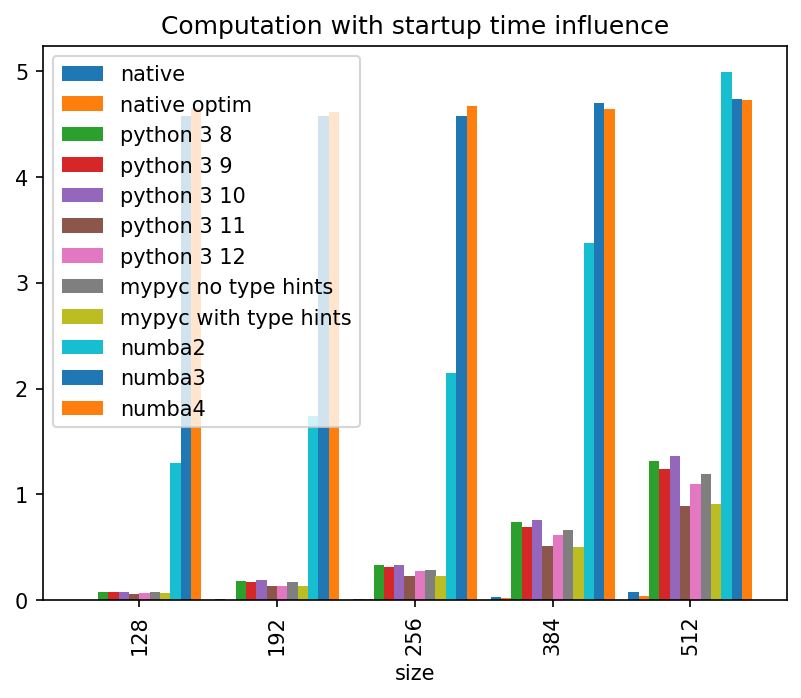

In [9]:
results[5:10].plot(kind='bar', stacked=False, width=0.9, title="Computation with startup time influence")

<Axes: title={'center': 'Extensive computation'}, xlabel='size'>

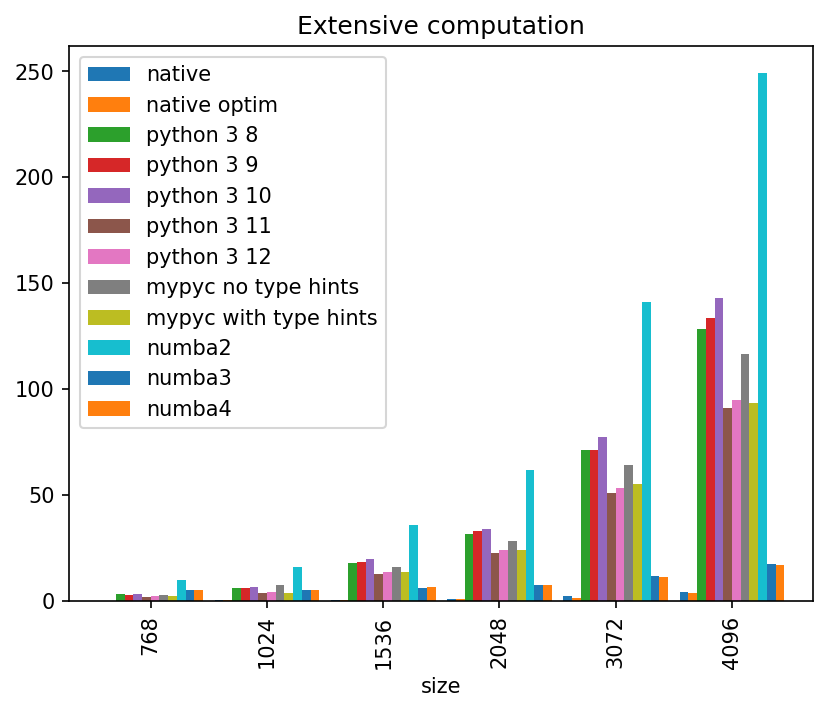

In [10]:
results[10:].plot(kind='bar', stacked=False, width=0.9, title="Extensive computation")

<Axes: title={'center': 'Approximation, incl. startup time'}, xlabel='size'>

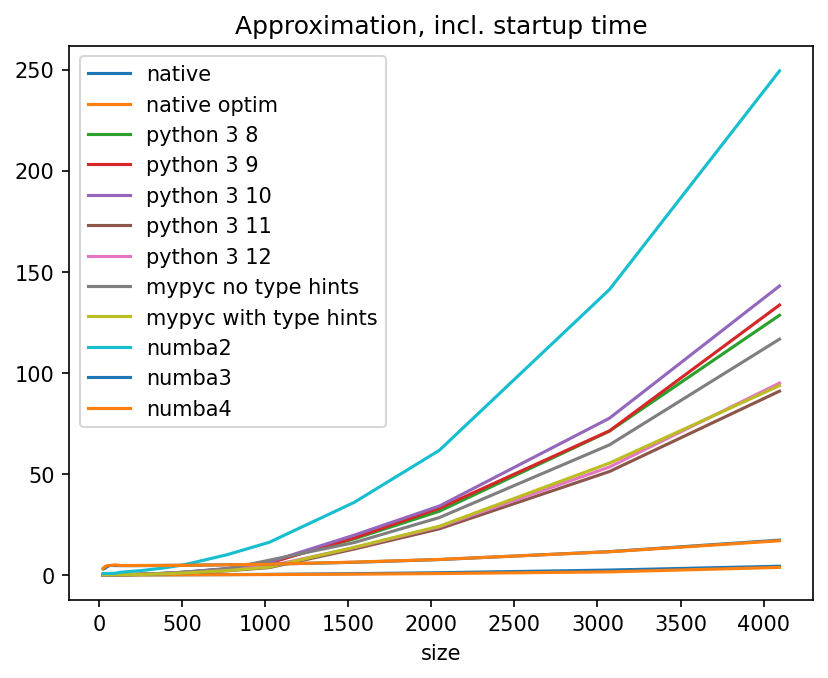

In [11]:
results.plot(title="Approximation, incl. startup time")

<Axes: title={'center': 'Numba/CPython thresholds'}, xlabel='size'>

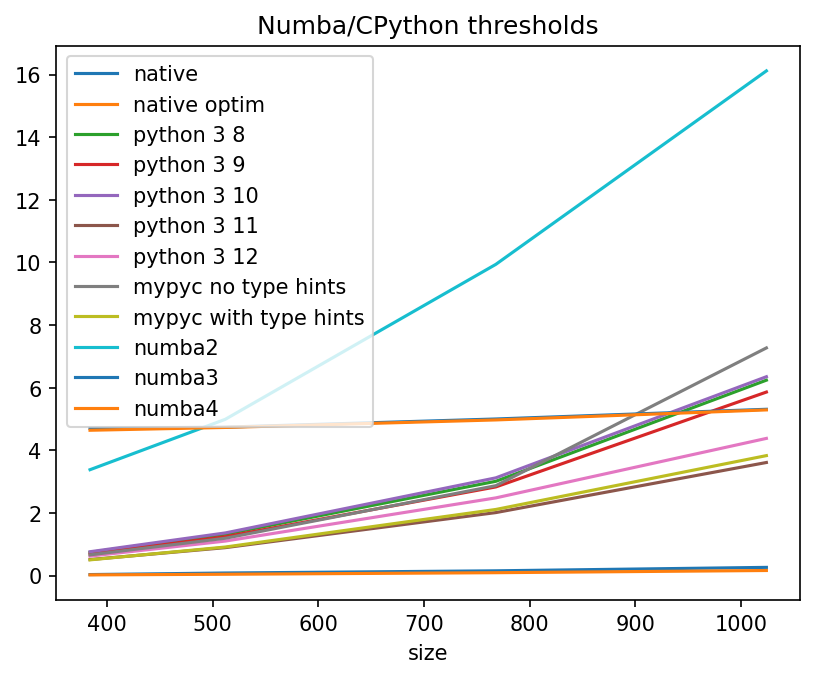

In [12]:
results[8:12].plot(title="Numba/CPython thresholds")

<Axes: title={'center': 'Python interpreters only'}, xlabel='size'>

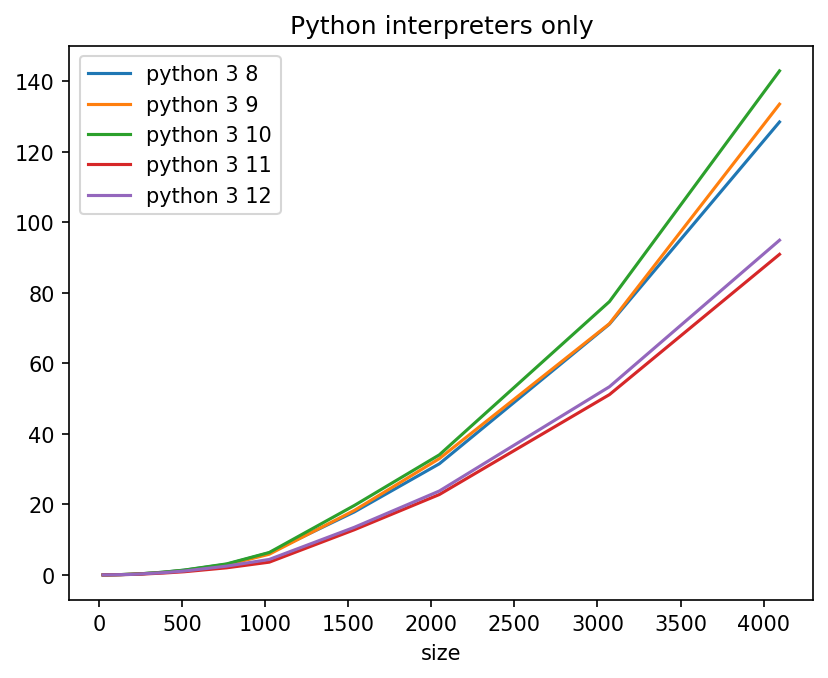

In [15]:
results[:][["python 3 8", "python 3 9" , "python 3 10", "python 3 11", "python 3 12"]].plot(title="Python interpreters only")